### Study of the impact of the workshops on the marks of schools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/SchoolLevel.csv', sep=';')

In [3]:
df.shape

(1570, 79)

In [4]:
df.head()

,X,schoolcode,Candidates_2013,Passed_2013,Average_Marks_2013,Change_Average_Marks_2013,Band_2013,Rank_2013,Candidates_2014,Passed_2014,...,WS.2013,WS.2014,WS.2015,Region,english_grade_numeric,science_grade_numeric,kiswahili_grade_numeric,maarifa_grade_numeric,hisabati_grade_numeric,average_grade_numeric
0,1,P0501001,72,71,149.78,36.65,5,780,51,50,...,0,0,0,Kagera,2,2,3,3,3,3
1,2,P0501004,69,67,146.01,33.76,5,919,58,57,...,0,0,0,Kagera,2,2,3,2,2,2
2,3,P0501002,41,28,116.34,29.88,6,3661,47,32,...,0,0,0,Kagera,3,3,3,3,3,3
3,4,P0501019,15,14,166.73,74.73,4,368,15,12,...,0,1,0,Kagera,2,2,2,1,2,2
4,5,P0501093,51,50,177.59,10.30,4,226,42,42,...,0,0,0,Kagera,1,1,1,2,1,1


In [5]:
print sorted(list(df.columns))

['Average_Marks_2011', 'Average_Marks_2012', 'Average_Marks_2013', 'Average_Marks_2014', 'Band_2011', 'Band_2013', 'Band_2014', 'Bonanza_2012', 'Bonanza_2013', 'Bonanza_2014', 'Bonanza_sum', 'Candidates_2011', 'Candidates_2012', 'Candidates_2013', 'Candidates_2014', 'Change_Average_2012', 'Change_Average_Marks_2013', 'Change_Average_Marks_2014', 'Identifier', 'Passed_2011', 'Passed_2012', 'Passed_2013', 'Passed_2014', 'Project_2013', 'Project_2014', 'Rank_2011', 'Rank_2012', 'Rank_2013', 'Rank_2014', 'Region', 'SUM.WORKSHOPS', 'Schoolname', 'Schoolproject_description', 'Schoolproject_happened', 'Schoolprojects_Boys', 'Schoolprojects_Girls', 'Schoolprojects_Students_Total', 'Unnamed: 19', 'WS.2010', 'WS.2011', 'WS.2012', 'WS.2013', 'WS.2014', 'WS.2015', 'WS1', 'WS10', 'WS11', 'WS12', 'WS13', 'WS19', 'WS2', 'WS20', 'WS21', 'WS22', 'WS23', 'WS24', 'WS25', 'WS26', 'WS27', 'WS28', 'WS29', 'WS3', 'WS30', 'WS31', 'WS32', 'WS4', 'WS5', 'WS6', 'WS7', 'WS8', 'WS9', 'X', 'average_grade_numeric', 

#### First insight: does having a project on the school impacts the average marks of the school on the next year?

In [6]:
# mean 2014 average mark of all schools that had NO project before:
m1 = df[(df["Project_2013"]==0) & (df["Project_2014"]==0)]["Average_Marks_2014"].mean()
print("Schools with NO project have a 2014 average mark of:\t %.1f" % m1)
# mean 2014 average mark of all schools that had a project the year before:
m2 = df[(df["Project_2013"]==1) & (df["Project_2014"]==0)]["Average_Marks_2014"].mean()
print("Schools with a project have a 2014 average mark of:\t %.1f  (+%.0f%%)" % 
      (m2, ((m2-m1)/m1)*100))

Schools with NO project have a 2014 average mark of:	 118.0
Schools with a project have a 2014 average mark of:	 127.3  (+8%)


So **YES**, as expected, schools with a project have better marks. Of course that can be due not to the benefits of the project itself, but to the fact that the schools that are awarded a project were already the best ones.

Let's investigate that, by looking at the average marks of schools in the past:

In [7]:
m1 = df[(df["Project_2013"]==0) & (df["Project_2014"]==0)][["Average_Marks_2011","Average_Marks_2012"]].mean().mean()
print("Past average mark of schools with NO project:\t %.1f" % m1)
m2 = df[(df["Project_2013"]==1) | (df["Project_2014"]==1)][["Average_Marks_2011","Average_Marks_2012"]].mean().mean()
print("Past average mark of schools with a project:\t %.1f  (+%.0f%%)" % 
      (m2, ((m2-m1)/m1)*100))

Past average mark of schools with NO project:	 108.6
Past average mark of schools with a project:	 110.4  (+2%)


So there was indeed a previous difference between project/NO-project schools before the projects took place, but it was small (~2%), and this difference increased fourfold after the realization of the projects.

### Impact of having workshops (WS)

First, we will have a closer look at the data.

For our purposes, we only want to study the columns:
 - "WS.year": number of workshops taken by a teacher of the school that year
 - "Average_Marks_year": average marks of the school that year

In [8]:
# reindex by column 'X' and sort columns alphabetically:
df = df.set_index(['X'])
df = df.reindex_axis(sorted(df.columns), axis=1)

# Keep only specific columns:
WScols = ['WS.%i' % i for i in xrange(2010,2016)]
cols_to_keep = list(WScols) # adding list() avoids automatic modification of WScols
Average_Marks_cols = ['Average_Marks_%i' % i for i in xrange(2011,2015)]
cols_to_keep.extend(Average_Marks_cols)
cols_to_keep.append('SUM.WORKSHOPS')
print cols_to_keep
df = df[cols_to_keep]
df.head()

['WS.2010', 'WS.2011', 'WS.2012', 'WS.2013', 'WS.2014', 'WS.2015', 'Average_Marks_2011', 'Average_Marks_2012', 'Average_Marks_2013', 'Average_Marks_2014', 'SUM.WORKSHOPS']


,WS.2010,WS.2011,WS.2012,WS.2013,WS.2014,WS.2015,Average_Marks_2011,Average_Marks_2012,Average_Marks_2013,Average_Marks_2014,SUM.WORKSHOPS
X,,,,,,,,,,,
1,0,0,0,0,0,0,153.98,113.13,149.78,150.55,0
2,0,0,1,0,0,0,152.75,112.25,146.01,179.76,1
3,0,0,0,0,0,0,108.19,86.46,116.34,114.66,0
4,0,0,0,0,1,0,144.26,92.00,166.73,116.87,1
5,0,0,0,0,0,0,179.14,167.29,177.59,190.33,0


#### How many null data do we have?

In [9]:
# percentage of null data in dataset:
print("\n\n***** Columns with NULL data:\n\n")
n_cols_notnull = 0
for col in sorted(list(df.columns)):
    percent_null = float(df[col].isnull().sum()) / df.shape[0] * 100
    if percent_null > 0:
        print("{:15s}   {:.1f}%".format(col, percent_null))
    else:
        n_cols_notnull += 1
print("\n\n***** The other %i columns have NO NULL values :)\n\n" % n_cols_notnull)



***** Columns with NULL data:


Average_Marks_2011   39.0%
Average_Marks_2012   37.3%
Average_Marks_2013   7.2%
Average_Marks_2014   6.4%


***** The other 7 columns have NO NULL values :)




#### How many schools had workshops?

In [10]:
col = 'SUM.WORKSHOPS'
print '*** Feature: ',col,' ***'
print '    number of uniques:',len(df[col].unique())
print 'Categories    Counts\n',pd.value_counts(df[col]),'\n\n'

*** Feature:  SUM.WORKSHOPS  ***
    number of uniques: 4
Categories    Counts
0    1083
1     416
2      61
3      10
dtype: int64 




#### How are the workshops distributed per year?

In [11]:
for col in df[WScols]:
    print '*** Feature: ',col,' ***'
    print '    number of uniques:',len(df[col].unique())
    print 'Categories    Counts\n',pd.value_counts(df[col]),'\n\n'

*** Feature:  WS.2010  ***
    number of uniques: 3
Categories    Counts
0    1489
1      79
2       2
dtype: int64 


*** Feature:  WS.2011  ***
    number of uniques: 2
Categories    Counts
0    1412
1     158
dtype: int64 


*** Feature:  WS.2012  ***
    number of uniques: 2
Categories    Counts
0    1528
1      42
dtype: int64 


*** Feature:  WS.2013  ***
    number of uniques: 2
Categories    Counts
0    1502
1      68
dtype: int64 


*** Feature:  WS.2014  ***
    number of uniques: 3
Categories    Counts
0    1484
1      85
2       1
dtype: int64 


*** Feature:  WS.2015  ***
    number of uniques: 3
Categories    Counts
0    1442
1     126
2       2
dtype: int64 




#### We will explore how the schools performed 1, 2 or 3 years after doing the workshop, compared with those schools that never had a workshop

First, we create a new feature with the last year in which the schools had a workshop:

In [12]:
def last_yr(WSyrs):
    if WSyrs['WS.2015']>0:
        return '2015'
    elif WSyrs['WS.2014']>0:
        return '2014'
    elif WSyrs['WS.2013']>0:
        return '2013'
    elif WSyrs['WS.2012']>0:
        return '2012'
    elif WSyrs['WS.2011']>0:
        return '2011'
    elif WSyrs['WS.2010']>0:
        return '2010'
    else: return 0

df['lastWSyr'] = df[WScols].apply(last_yr, axis=1)

col = 'lastWSyr'
print '*** Feature: ',col,' ***'
print '    number of uniques:',len(df[col].unique())
print 'Categories    Counts\n',pd.value_counts(df['lastWSyr']),'\n\n'

*** Feature:  lastWSyr  ***
    number of uniques: 7
Categories    Counts
0       1083
2011     128
2015     128
2014      86
2013      67
2012      41
2010      37
dtype: int64 




In [13]:
df.groupby('lastWSyr')['Average_Marks_2014'].mean()

lastWSyr
0       117.489078
2010    123.241667
2011    124.632155
2012    115.305854
2013    103.128806
2014    132.049884
2015    114.076538
Name: Average_Marks_2014, dtype: float64

Then we calculate the **average mark N years after last workshop**:

In [14]:
mycols = ['lastWSyr']
mycols.extend(Average_Marks_cols)
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Average_Marks_2011']
    elif cols['lastWSyr']=='2011':
        return cols['Average_Marks_2012']
    elif cols['lastWSyr']=='2012':
        return cols['Average_Marks_2013']
    elif cols['lastWSyr']=='2013':
        return cols['Average_Marks_2014']    
    else:
        return None
df['Mark_1_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [15]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Average_Marks_2012']
    elif cols['lastWSyr']=='2011':
        return cols['Average_Marks_2013']
    elif cols['lastWSyr']=='2012':
        return cols['Average_Marks_2014']
    else:
        return None
df['Mark_2_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [16]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Average_Marks_2013']
    elif cols['lastWSyr']=='2011':
        return cols['Average_Marks_2014']
    else:
        return None
df['Mark_3_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [17]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Average_Marks_2014']
    else:
        return None
df['Mark_4_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [18]:
Marks_afterWScols = ['Mark_%i_afterWS' % i for i in xrange(1,5)]
print Marks_afterWScols

['Mark_1_afterWS', 'Mark_2_afterWS', 'Mark_3_afterWS', 'Mark_4_afterWS']


And we calculate the **average mark of the schools that NEVER took a workshop**:

In [19]:
print("There are %i schools that NEVER attended a workshop" % 
      df['SUM.WORKSHOPS'][df['SUM.WORKSHOPS']==0].count() )

There are 1083 schools that NEVER attended a workshop


In [20]:
# mean average mark of the schools that did not take the workshop:
def av_only_no_WS(cols):
    return cols[1:].mean() if cols['SUM.WORKSHOPS']==0 else None
    
df['Av_Marks_NoWS'] = df[['SUM.WORKSHOPS'] + Average_Marks_cols].apply(av_only_no_WS, axis=1)

We explore the calculated marks...

In [21]:
df[['Av_Marks_NoWS']+Marks_afterWScols].mean()

Av_Marks_NoWS     112.677892
Mark_1_afterWS    105.341642
Mark_2_afterWS    114.638358
Mark_3_afterWS    121.048301
Mark_4_afterWS    123.241667
dtype: float64

In [22]:
df[Average_Marks_cols].mean()

Average_Marks_2011    123.977513
Average_Marks_2012     93.222876
Average_Marks_2013    110.648765
Average_Marks_2014    118.088646
dtype: float64

... and we realise that some of the variation on the marks N years after workshop is due to the intrinsic variation of marks during the years, not to a change in performance due to the workshops (because for instance "Mark_4_afterWS" is calculated only with "Average_Marks_2014", whereas "Mark_1_afterWS" includes "Average_Marks_2011, 2012, 2013 and 2014").

So we calculate a new performance score...

### Performance Score

The new score called "Performance" will be the average mark of the school weighted over the mean of the average marks of the schools that year.

In [23]:
df["Performance_2011"] = df['Average_Marks_2011'].apply(lambda x: x/df['Average_Marks_2011'].mean())
df["Performance_2012"] = df['Average_Marks_2012'].apply(lambda x: x/df['Average_Marks_2012'].mean())
df["Performance_2013"] = df['Average_Marks_2013'].apply(lambda x: x/df['Average_Marks_2013'].mean())
df["Performance_2014"] = df['Average_Marks_2014'].apply(lambda x: x/df['Average_Marks_2014'].mean())

The annual mean of the performance is always 1, independently of the year. So the performance is a measure of how good the school performed compared to the average performance of the other schools that year.

In [24]:
Perfor_cols = ["Performance_%i" % i for i in xrange(2011,2015)]
print Perfor_cols
df[Perfor_cols].describe()

['Performance_2011', 'Performance_2012', 'Performance_2013', 'Performance_2014']


,Performance_2011,Performance_2012,Performance_2013,Performance_2014
count,957.000000,984.000000,1457.000000,1470.000000
mean,1.000000,1.000000,1.000000,1.000000
std,0.203220,0.267419,0.239225,0.236281
min,0.475893,0.548041,0.557982,0.521727
25%,0.860559,0.827747,0.846372,0.840830
50%,0.976145,0.936465,0.945695,0.953055
75%,1.113347,1.087206,1.085868,1.108637
max,1.795487,2.365943,2.010054,1.925926


Other possible ways to calculate the performance score, all of them leading to similar results, are:

In [25]:
# Performance as normalized mark (x-mean/(max-min))
#df[Perfor_cols] = (df[Average_Marks_cols] - df[Average_Marks_cols].mean()) / (df[Average_Marks_cols].max() - df[Average_Marks_cols].min())
# Performance as deviation from mean
#df[Perfor_cols] = df[Average_Marks_cols] - df[Average_Marks_cols].mean()
# Performance as deviation from median
#df[Perfor_cols] = df[Average_Marks_cols] - df[Average_Marks_cols].median()

Calculation of **Performance N years after last workshop**:

In [26]:
mycols = ['lastWSyr']
mycols.extend(Perfor_cols)
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Performance_2011']
    elif cols['lastWSyr']=='2011':
        return cols['Performance_2012']
    elif cols['lastWSyr']=='2012':
        return cols['Performance_2013']
    elif cols['lastWSyr']=='2013':
        return cols['Performance_2014']    
    else:
        return None
df['Perf_1_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [27]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Performance_2012']
    elif cols['lastWSyr']=='2011':
        return cols['Performance_2013']
    elif cols['lastWSyr']=='2012':
        return cols['Performance_2014']
    else:
        return None
df['Perf_2_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [28]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Performance_2013']
    elif cols['lastWSyr']=='2011':
        return cols['Performance_2014']
    else:
        return None
df['Perf_3_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [29]:
def get_marks_WS(cols):
    if cols['lastWSyr']=='2010':
        return cols['Performance_2014']
    else:
        return None
df['Perf_4_afterWS'] = df[mycols].apply(get_marks_WS, axis=1)

In [30]:
Perfs_afterWScols = ['Perf_%i_afterWS' % i for i in xrange(1,5)]
print Perfs_afterWScols

['Perf_1_afterWS', 'Perf_2_afterWS', 'Perf_3_afterWS', 'Perf_4_afterWS']


And we calculate the **Performance of the schools that NEVER took a workshop**:

In [31]:
# mean performance of the schools that did not take the workshop:
def perf_only_no_WS(cols):
    return cols[1:].mean() if cols['SUM.WORKSHOPS']==0 else None
    
df['Av_Perfs_NoWS'] = df[['SUM.WORKSHOPS']+Perfor_cols].apply(perf_only_no_WS, axis=1)

In [32]:
df[['Av_Perfs_NoWS']+Perfs_afterWScols].describe()

,Av_Perfs_NoWS,Perf_1_afterWS,Perf_2_afterWS,Perf_3_afterWS,Perf_4_afterWS
count,1083.000000,268.000000,201.000000,153.000000,36.000000
mean,0.999384,1.001439,1.046036,1.040184,1.043637
std,0.214565,0.249112,0.249454,0.219580,0.212096
min,0.596041,0.548578,0.588795,0.569008,0.626648
25%,0.864910,0.838256,0.886228,0.875359,0.889438
50%,0.954421,0.962055,0.978231,1.003737,1.011020
75%,1.063680,1.091340,1.175612,1.151931,1.212797
max,2.066000,2.302439,1.968662,1.862245,1.546889


## Plots

### Average marks

/data/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


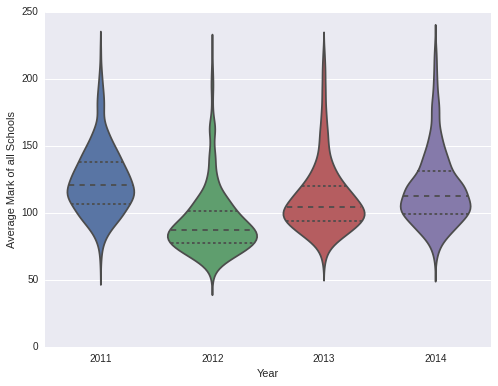

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x=df[Average_Marks_cols], inner="quartile")
ax.set_xlabel('Year')
ax.set_ylabel('Average Mark of all Schools')
ax.set_xticklabels(["2011", "2012", "2013", "2014"])
fig.savefig('Yearly_average_marks.eps', format='eps', dpi=100)
fig.savefig('Yearly_average_marks.pdf', format='pdf', dpi=100)

The plot above depicts *violin plots*. The shape of the violin shows the distribution of the performances, whereas the discontinuous lines inside the violins show the 1st quartile, the median and the 3rd quartile of the distributions.

In the plot above we can see that the average marks really change over the years. Now we are truly convinced that is better to use *Performance* instead of the *Average_mark*.

### Performance

Remember that the performance is the average mark weighted over the mean mark that year, so the annual mean of the performance of all schools is always one.

**Distribution of the performances** of all schools that never had a Workshop (WS), and those after 1, 2, 3 and 4 years of having the WS:

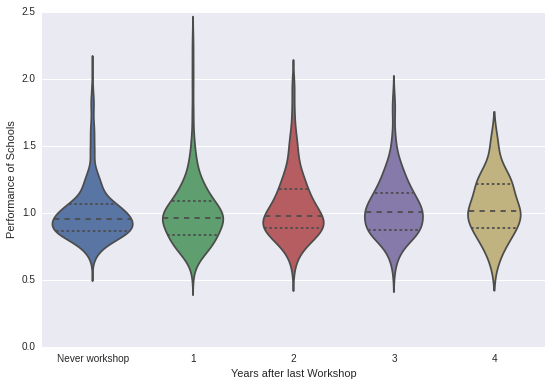

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.violinplot(x=df[['Av_Perfs_NoWS']+Perfs_afterWScols], inner="quartile")
ax.set_xlabel('Years after last Workshop')
ax.set_ylabel('Performance of Schools')
ax.set_xticklabels(["Never workshop","1", "2", "3", "4"])
fig.savefig('Performance_years_after_WS.eps', format='eps', dpi=100)
fig.savefig('Performance_years_after_WS.pdf', format='pdf', dpi=100)

The plot above depicts *violin plots*. The shape of the violin shows the distribution of the performances, whereas the discontinuous lines inside the violins show the 1st quartile, the median and the 3rd quartile of the distributions.

We can see that the performances of the schools improves after having a workshop, and it continues to improve during the following years.

In [37]:
#print df[['Av_Perfs_NoWS']+Perfs_afterWScols].median().values
#print df[['Av_Perfs_NoWS']+Perfs_afterWScols].mean().values
#print df[['Av_Perfs_NoWS']+Perfs_afterWScols].std().values

We will now perform a **linear regression** over the performances, to confirm that they indeed increase after having a workshop.

To do that we will use the lmplot function of the Seaborn package for statistical data visualization. This function needs our data in a specific format, so we will first transform the format of our data.

In [38]:
# new dataframe df2 with all rows and only performance columns (the last five):
df2 = df.ix[:,-5:]
# reindex and rename columns with the number of years after workshop (0 means never WS)
df2['index'] = df2.index
df2.columns = [1,2,3,4,0,'index']
# melt the dataframe
df2 = pd.melt(df2, id_vars='index', var_name='Years after last Workshop',
              value_name='School Performance').dropna().sort('index')

Plot the regression:

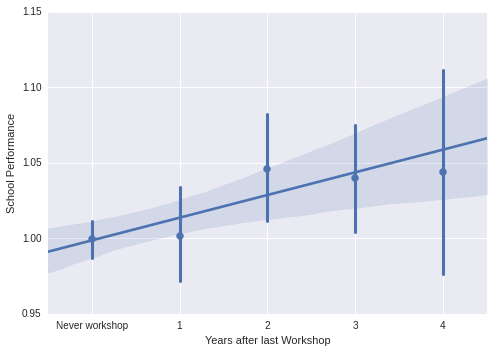

In [41]:
#fig, ax = plt.subplots(figsize=(9,6))
ax = sns.lmplot(x="Years after last Workshop", y="School Performance", data=df2,
                x_estimator=np.mean, size=5, aspect=1.4).set(xlim=(-0.5, 4.5))
ax.set_xticklabels(["", "Never workshop", "1", "2", "3", "4"])
ax.savefig('Regression_Performance_years_after_WS.eps', format='eps', dpi=100)
ax.savefig('Regression_Performance_years_after_WS.pdf', format='pdf', dpi=100)

(the blue area around the linear regression is the 95% confidence interval for the regression model)

## Conclusion:

#### We have confirmed that the performance of the schools improves after having a workshop.
#### Moreover, the workshops have a long-lasting impact, so the performance of the schools continues to improve during the following years after the workshop.